# Utilisation de la méthode force brute

Dans ce fichier, nous réaliserons une première analyse des descripteurs avec la méthode de recherche par force brute appelée aussi recherche exhaustive. 
Dans un premier temps : 
- Plus proche voisin avec les distances euclidienne et du Chi-2 
- k-plus proche voisin avec les distances euclidienne et du Chi-2 
- Recherche autour d'un pivot avec un rayon de taille X

In [424]:
import numpy as np
import cv2 as cv
import math
import brute_force as bf
from IPython.display import Image

In [425]:
images = np.load('./descripteur_img.npy')
images_name = np.load('./descripteur_img_filename.npy')

queries = np.load('./descripteur_queries.npy')
queries_name = np.load('./descripteur_queries_filename.npy')

x = 4 #Index de la requête : valeur entre prise entre 0 et 99

## Première partie : Force brute sur les descripteurs

- #### Plus proche voisin

In [426]:
#Distance Euclidienne
index_nghb,d_nghb = bf.knn_search(images, queries[x],1,'L2') #Index du plus proche voisin de x
print(index_nghb)

#Distance du chi-2
index_nghb_2,d_nghb_2 = bf.knn_search(images, queries[x],1,'Chi-2') #Index du plus proche voisin de x
print(index_nghb_2[0])

[457]
457


../Flickr8k/queries/152029243_b3582c36fa.jpg


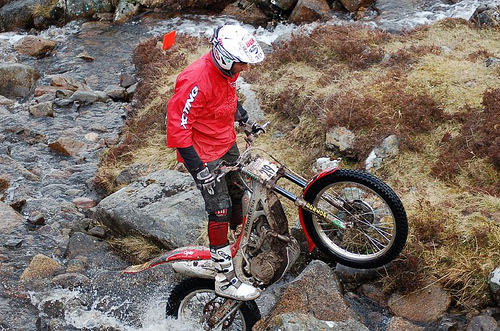

In [427]:
path_queries = f'../Flickr8k/queries/{"".join(queries_name[x])}'
print(path_queries)
Image(filename=path_queries)

../Flickr8k/images/143552829_72b6ba49d4.jpg


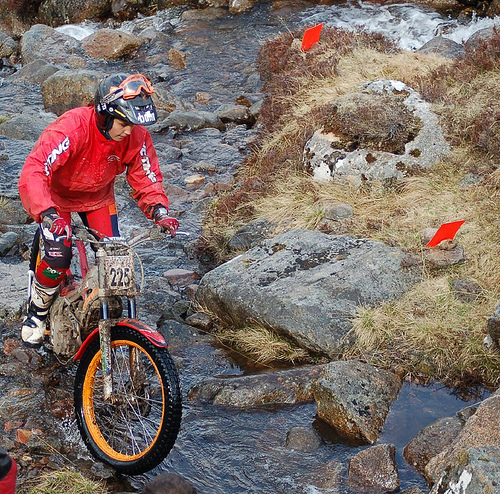

In [428]:
path_result = f'../Flickr8k/images/{"".join(images_name[index_nghb[0]])}'
print(path_result)
Image(filename=path_result)

../Flickr8k/images/143552829_72b6ba49d4.jpg


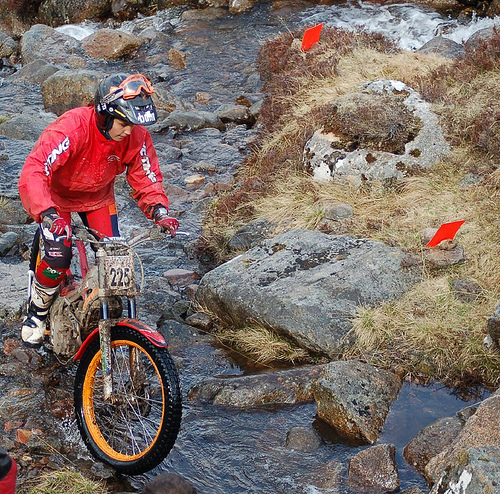

In [429]:
path_result_2 = f'../Flickr8k/images/{"".join(images_name[index_nghb_2[0]])}'
print(path_result_2)
Image(filename= path_result_2)

- #### K - plus proches voisins


In [430]:
k = 5 #nombre de voisins que l'on souhaite

# Distance euclidienne 

tab_index_nghb, tab_distance_nghb = bf.knn_search(images,queries[x],k,'L2')

# Distance du Chi-2

tab_index_nghb_2, tab_distance_nghb_2 = bf.knn_search(images,queries[x],k,'Chi-2')



In [431]:
print('Distance Euclidienne')
for i in tab_index_nghb:
    print(images_name[i])

print('\n Distance du Chi-2')
for j in tab_index_nghb_2:
    print(images_name[j])

Distance Euclidienne
['3372251830_baa3665928.jpg']
['143552829_72b6ba49d4.jpg']
['1470536919_1f3fd6c65a.jpg']
['3401437960_7da856e004.jpg']
['263522013_d118d46b2d.jpg']

 Distance du Chi-2
['3372251830_baa3665928.jpg']
['143552829_72b6ba49d4.jpg']
['263522013_d118d46b2d.jpg']
['1470536919_1f3fd6c65a.jpg']
['3373243733_9aba7740ed.jpg']


- #### Recherche dnas la région 
Utilisation d'un rayon autour d'un vecteur

In [432]:
rayon_euclidien = 0.4
rayon_chi2 = 1
# Distance euclidienne 

tab_index_area, tab_distance_area = bf.radius_search(images,queries[x],rayon_euclidien,'L2')

# Distance du chi-2

tab_index_area_2, tab_distance_area_2 = bf.radius_search(images,queries[x],rayon_chi2,'Chi-2')


In [433]:
print('Distance euclidienne')
print('Nombre de résultats : ', len(tab_index_area))
for i in tab_index_area:
    print(images_name[i])

print('\nDistance du Chi-2')
print('Nombre de résultats : ',len(tab_index_area_2))
for i in tab_index_area_2:
    print(images_name[i])


Distance euclidienne
Nombre de résultats :  12
['143552829_72b6ba49d4.jpg']
['1470536919_1f3fd6c65a.jpg']
['1810651611_35aae644fb.jpg']
['263522013_d118d46b2d.jpg']
['3228517564_74b00a923b.jpg']
['3288839246_fdb00395ae.jpg']
['3372251830_baa3665928.jpg']
['3373243733_9aba7740ed.jpg']
['3401437960_7da856e004.jpg']
['3501206996_477be0f318.jpg']
['427936315_0b8f7b8d23.jpg']
['509123893_07b8ea82a9.jpg']

Distance du Chi-2
Nombre de résultats :  1
['143552829_72b6ba49d4.jpg']


## Deuxième partie : recherche par force brute sur les descripteurs après ACP

In [434]:
images_acp = np.load('./descripteur_img_acp.npy')

queries_acp = np.load('./queries_acp.npy')

- #### Plus proche voisin ACP


In [435]:
index_nghb_acp,d_nghb_acp = bf.knn_search(images, queries[x],1,'L2') #Index du plus proche voisin de x
print(index_nghb[0]) 


457


- #### K plus proches voisins ACP

In [436]:
k = 5

# Distance Euclidienne
tab_index_nghb_acp, tab_d_nghb_acp = bf.knn_search(images, queries[x],k,'L2') #Index du plus proche voisin de x


# Distance du Chi-2
tab_index_nghb_acp_2, tab_d_nghb_acp_2 = bf.knn_search(images, queries[x],k,'Chi-2') #Index du plus proche voisin de x

In [440]:
print('Distance Euclidienne')
for i in tab_index_nghb_acp:
    print(images_name[i])

print('\n Distance du Chi-2')
for j in tab_index_nghb_acp_2:
    print(images_name[j])

Distance Euclidienne
['3372251830_baa3665928.jpg']
['143552829_72b6ba49d4.jpg']
['1470536919_1f3fd6c65a.jpg']
['3401437960_7da856e004.jpg']
['263522013_d118d46b2d.jpg']

 Distance du Chi-2
['3372251830_baa3665928.jpg']
['143552829_72b6ba49d4.jpg']
['263522013_d118d46b2d.jpg']
['1470536919_1f3fd6c65a.jpg']
['3373243733_9aba7740ed.jpg']


- #### Recherche dnas la région ACP
Utilisation d'un rayon autour d'un vecteur

In [441]:
rayon_euclidien = 0.4
rayon_chi2 = 1
# Distance euclidienne 

tab_index_area_acp, tab_distance_area_acp = bf.radius_search(images,queries[x],rayon_euclidien,'L2')

# Distance du chi-2

tab_index_area_acp_2, tab_distance_area_acp_2 = bf.radius_search(images,queries[x],rayon_chi2,'Chi-2')

In [442]:
print('Distance euclidienne')
print('Nombre de résultats : ', len(tab_index_area))
for i in tab_index_area_acp:
    print(images_name[i])

print('\nDistance du Chi-2')
print('Nombre de résultats : ',len(tab_index_area_2))
for i in tab_index_area_acp_2:
    print(images_name[i])

Distance euclidienne
Nombre de résultats :  12
['143552829_72b6ba49d4.jpg']
['1470536919_1f3fd6c65a.jpg']
['1810651611_35aae644fb.jpg']
['263522013_d118d46b2d.jpg']
['3228517564_74b00a923b.jpg']
['3288839246_fdb00395ae.jpg']
['3372251830_baa3665928.jpg']
['3373243733_9aba7740ed.jpg']
['3401437960_7da856e004.jpg']
['3501206996_477be0f318.jpg']
['427936315_0b8f7b8d23.jpg']
['509123893_07b8ea82a9.jpg']

Distance du Chi-2
Nombre de résultats :  1
['143552829_72b6ba49d4.jpg']
